<a href="https://colab.research.google.com/github/Real1CM/ComputerVison/blob/main/11_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
!unzip /content/files-for-face-verification-and-recognition.zip -d /content/files-for-face-verification-and-recognition/

Archive:  /content/files-for-face-verification-and-recognition.zip
  inflating: /content/files-for-face-verification-and-recognition/images/andrew.jpg  
  inflating: /content/files-for-face-verification-and-recognition/images/arnaud.jpg  
  inflating: /content/files-for-face-verification-and-recognition/images/benoit.jpg  
  inflating: /content/files-for-face-verification-and-recognition/images/bertrand.jpg  
  inflating: /content/files-for-face-verification-and-recognition/images/camera_0.jpg  
  inflating: /content/files-for-face-verification-and-recognition/images/camera_1.jpg  
  inflating: /content/files-for-face-verification-and-recognition/images/camera_2.jpg  
  inflating: /content/files-for-face-verification-and-recognition/images/camera_3.jpg  
  inflating: /content/files-for-face-verification-and-recognition/images/camera_4.jpg  
  inflating: /content/files-for-face-verification-and-recognition/images/camera_5.jpg  
  inflating: /content/files-for-face-verification-and-recog

In [23]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, ZeroPadding2D, Activation, Input, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import MaxPooling2D, AveragePooling2D
from tensorflow.keras.layers import Concatenate
from tensorflow.keras.layers import Lambda, Flatten, Dense
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.layers import Layer
from tensorflow.keras import backend as K
K.set_image_data_format('channels_last')
import os
import numpy as np
from numpy import genfromtxt
import pandas as pd
import PIL

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
import tf_keras as k3
model = k3.models.load_model('./files-for-face-verification-and-recognition/model')

In [27]:
def triplet_loss(y_true, y_pred, alpha = 0.2):

    anchor, positive, negative = y_pred[0], y_pred[1], y_pred[2]

    pos_dist = tf.reduce_sum(tf.square(tf.subtract(anchor, positive)), axis=-1)
    neg_dist = tf.reduce_sum(tf.square(tf.subtract(anchor, negative)), axis=-1)
    basic_loss = tf.add(tf.subtract(pos_dist, neg_dist), alpha)
    loss = tf.reduce_sum(tf.maximum(basic_loss, 0))

    return loss

In [28]:
FRmodel = model

In [29]:
def img_to_encoding(image_path, model):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(160, 160))
    img = np.around(np.array(img) / 255.0, decimals=12)
    x_train = np.expand_dims(img, axis=0) # add a dimension of 1 as first dimension
    embedding = model.predict_on_batch(x_train)
    return embedding / np.linalg.norm(embedding, ord=2)

In [30]:
database = {}
database["danielle"] = img_to_encoding("./files-for-face-verification-and-recognition/images/danielle.png", FRmodel)
database["younes"] = img_to_encoding("./files-for-face-verification-and-recognition/images/younes.jpg", FRmodel)
database["tian"] = img_to_encoding("./files-for-face-verification-and-recognition/images/tian.jpg", FRmodel)
database["andrew"] = img_to_encoding("./files-for-face-verification-and-recognition/images/andrew.jpg", FRmodel)
database["kian"] = img_to_encoding("./files-for-face-verification-and-recognition/images/kian.jpg", FRmodel)
database["dan"] = img_to_encoding("./files-for-face-verification-and-recognition/images/dan.jpg", FRmodel)
database["sebastiano"] = img_to_encoding("./files-for-face-verification-and-recognition/images/sebastiano.jpg", FRmodel)
database["bertrand"] = img_to_encoding("./files-for-face-verification-and-recognition/images/bertrand.jpg", FRmodel)
database["kevin"] = img_to_encoding("./files-for-face-verification-and-recognition/images/kevin.jpg", FRmodel)
database["felix"] = img_to_encoding("./files-for-face-verification-and-recognition/images/felix.jpg", FRmodel)
database["benoit"] = img_to_encoding("./files-for-face-verification-and-recognition/images/benoit.jpg", FRmodel)
database["arnaud"] = img_to_encoding("./files-for-face-verification-and-recognition/images/arnaud.jpg", FRmodel)

In [32]:
danielle = tf.keras.preprocessing.image.load_img("./files-for-face-verification-and-recognition/images/danielle.png", target_size=(160, 160))
kian = tf.keras.preprocessing.image.load_img("./files-for-face-verification-and-recognition/images/kian.jpg", target_size=(160, 160))

In [33]:
np.around(np.array(kian) / 255.0, decimals=12).shape

(160, 160, 3)

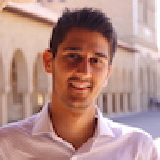

In [34]:
kian

In [35]:
np.around(np.array(danielle) / 255.0, decimals=12).shape

(160, 160, 3)

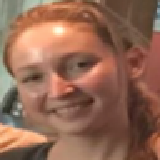

In [36]:
danielle

In [37]:
def verify(image_path, identity, database, model):

    encoding = img_to_encoding(image_path, model)
    dist = np.linalg.norm(tf.subtract(database[identity], encoding))
    if dist < 0.7:
        print("It's " + str(identity) + ", welcome in!")
        door_open = True
    else:
        print("It's not " + str(identity) + ", please go away")
        door_open = False
    return dist, door_open

In [39]:
distance, door_open_flag = verify("./files-for-face-verification-and-recognition/images/camera_0.jpg", "younes", database, FRmodel)
print("(", distance, ",", door_open_flag, ")")

It's younes, welcome in!
( 0.6019791 , True )


In [41]:
verify("./files-for-face-verification-and-recognition/images/camera_2.jpg", "kian", database, FRmodel)

It's not kian, please go away


(1.0130048, False)

In [42]:
def who_is_it(image_path, database, model):

    encoding =  img_to_encoding(image_path, model)

    min_dist = 100

    for (name, db_enc) in database.items():

        dist = np.linalg.norm(tf.subtract(db_enc, encoding))

        if dist < min_dist:
            min_dist = dist
            identity = name

    if min_dist > 0.7:
        print("Not in the database.")
    else:
        print ("it's " + str(identity) + ", the distance is " + str(min_dist))

    return min_dist, identity

In [44]:
who_is_it("./files-for-face-verification-and-recognition/images/camera_0.jpg", database, FRmodel)

test1 = who_is_it("./files-for-face-verification-and-recognition/images/camera_0.jpg", database, FRmodel)

test2 = who_is_it("./files-for-face-verification-and-recognition/images/younes.jpg", database, FRmodel)

it's younes, the distance is 0.6019791
it's younes, the distance is 0.6019791
it's younes, the distance is 0.0
